# Home Credit Default Risk

1. Introdução | Overview
2. Descrição dos dados | Data Description
3. Carregando os dados | Load data
4. Análise Exploratória | Data Exploration 

    4.1 Empréstimos - dados de treinamento | Loan - train data set
        4.1.1 Distribuição da variavel Target | Target Distribuction 
        4.1.2 Analise dos empréstimos | Loan analysis
    4.2 Analise do histórico de crédito | Todo 
        4.2.1 Crédito anteriores fornecidos por outras instituições | Todo 
        4.2.2 Crédito anteriores na Credit Bureau | Todo 
        4.2.3 Histórico mensal de emprestimo na Home Credit | Todo 
        4.2.4 Histórico mensal no cartão de crédito na Home Credit | Todo 
        4.2.5 Solicitações de crédito anteriores na Home Credit | Todo 
        4.2.6 Histórico de amortização na Home Credit | Todo 
    4.3 Todo
5. Correlação | Correlation
6. Feature Selection with Random Forest
7. ...

## 1. Introdução | Overview

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

[Home Credit Group](http://www.homecredit.net/) strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## 2. Descrição dos Dados | Data Description


* application_{train|test}.csv

    * This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
    * Static data for all applications. One row represents one loan in our data sample.

* bureau.csv

    * All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
    * For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

* bureau_balance.csv

    * Monthly balances of previous credits in Credit Bureau.
    * This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

* POS_CASH_balance.csv

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.
credit_card_balance.csv

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.
previous_application.csv

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.
installments_payments.csv

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.
HomeCredit_columns_description.csv

This file contains descriptions for the columns in the various data files.

![teste](home_credit.png)

** Pacotes | Import packages **

In [1]:
# Instalação dos pacotes.
# !pip install imblearn

import time
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report

# DataViz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()

%matplotlib inline
plt.style.use('ggplot')
# sns.set_style('whitegrid')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## 3. Carregando os dados | Load Data

In [2]:
def load_data(data_src):
    
    start_time = time.time()
    
    train = pd.read_csv('{}application_train.csv'.format(data_src))
    test = pd.read_csv('{}application_test.csv'.format(data_src))
    print('Train and test tables loaded.')
    
    bureau = pd.read_csv('{}bureau.csv'.format(data_src))
    bureau_bal = pd.read_csv('{}bureau_balance.csv'.format(data_src))
    print('Bureau data loaded.')
    
    prev = pd.read_csv('{}previous_application.csv'.format(data_src))
    print('Previous applications data loaded.')
    
    cred_card_bal = pd.read_csv('{}credit_card_balance.csv'.format(data_src))
    print('Credit card balance loaded.')
    
    pos_cash_bal = pd.read_csv('{}POS_CASH_balance.csv'.format(data_src))
    print('POS cash balance loaded.')
    
    ins = pd.read_csv('{}installments_payments.csv'.format(data_src))
    print('Installments data loaded.')
    
    # error if using engine c - 'utf-8' codec can't decode byte 0x85
    data_description = pd.read_csv('{}HomeCredit_columns_description.csv'.format(data_src), engine='python')
    
    print('Time it took to load all the data: {:.4f}s\n'.format(time.time() - start_time))
    
    return train, test, bureau, bureau_bal, prev, cred_card_bal, pos_cash_bal, ins, data_description

train, test, bureau, bureau_bal, prev, cred_card_bal, pos_cash_bal, ins, data_description = load_data('data/all/')

Train and test tables loaded.
Bureau data loaded.
Previous applications data loaded.
Credit card balance loaded.
POS cash balance loaded.
Installments data loaded.
Time it took to load all the data: 64.0904s



In [3]:
df_train = train.copy()
df_test = test.copy()

## 4. Analise Exploratória | Data Exploration

## Todo: Realizar analise exploratoria para entender os dados 

** Todo: **

1. Describle das variaveis númericas
2. Barplot das categóricas


### Missing values

** Todo **

* Tratar os dados missing das variáveis númericas. As categoricas são tratadas pelo LabelEnconde.

In [3]:
def missing_data(data):
    total = data.isnull().count()
    missing = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    return pd.concat([total, missing, percent], axis=1, 
                     keys=['Total', 'Missing', 'Percent']) \
                     .sort_values(by=['Percent'], ascending=False)

** Missing values no dataset de treino **

In [4]:
# train dataset
missing_data(train).head(10)

,Total,Missing,Percent
COMMONAREA_MEDI,307511,214865,69.872297
COMMONAREA_AVG,307511,214865,69.872297
COMMONAREA_MODE,307511,214865,69.872297
NONLIVINGAPARTMENTS_MODE,307511,213514,69.432963
NONLIVINGAPARTMENTS_AVG,307511,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,307511,213514,69.432963
FONDKAPREMONT_MODE,307511,210295,68.386172
LIVINGAPARTMENTS_MODE,307511,210199,68.354953
LIVINGAPARTMENTS_AVG,307511,210199,68.354953
LIVINGAPARTMENTS_MEDI,307511,210199,68.354953


** Missing values no dataset de Teste **

In [ ]:
# test dataset
missing_data(test).head(10)

### Distribuição da variável Target

Distribuição da variável - Good(0) e Bad(1): 
0    282686
1     24825
Name: TARGET, dtype: int64


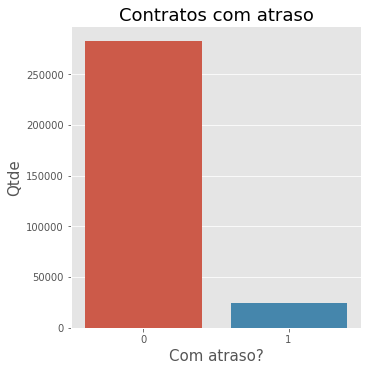

In [5]:
print("Distribuição da variável - Good(0) e Bad(1): ")
print(train["TARGET"].value_counts())

sns.factorplot(x ="TARGET", kind='count', data=train, size=5)
plt.title("Contratos com atraso", fontsize=18)
plt.xlabel("Com atraso?", fontsize=15)
plt.ylabel("Qtde", fontsize=15)
plt.show()

### Qtde por feature e porcentagem de inadimplentes 

In [9]:
def plot_stats(data, feature, label_rotation=False, horizontal_layout=True):
    temp = data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})
    #sns.set_style('whitegrid')
    
    # Calculate the percentage of target=1 per category value
    cat_perc = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

** Análise por Tipo de Contrato **

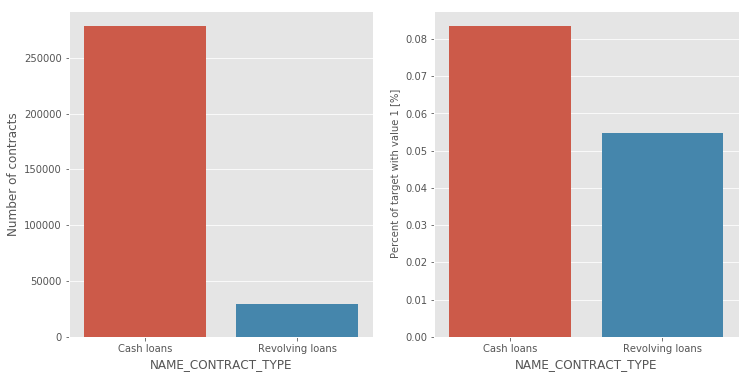

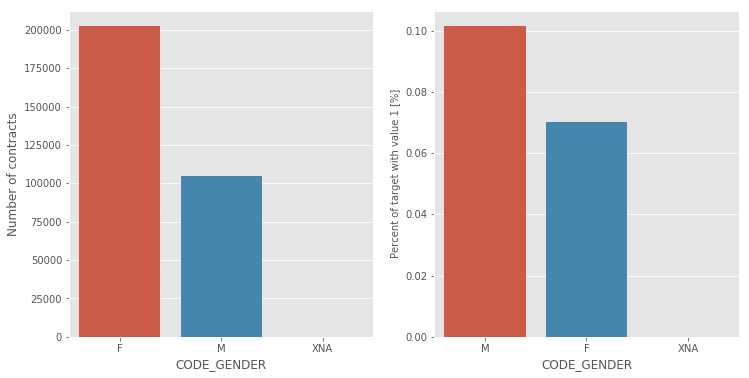

In [14]:
plot_stats(train, 'NAME_CONTRACT_TYPE')
plot_stats(train, 'CODE_GENDER')

## 

In [3]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


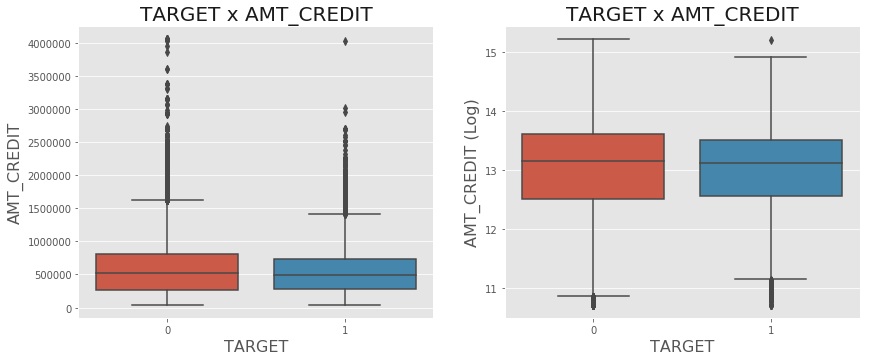

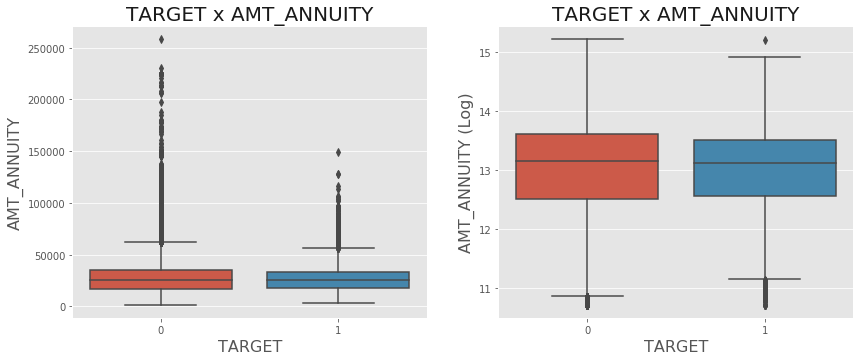

In [29]:
def plot_distribution(df, feature):

    #Feature engineering to a better visualization of the values
    df['{}_log'.format(feature)] = np.log(df.AMT_CREDIT + 0.01)

    plt.figure(figsize=(14,6))
    #I will explore the Amount by Class and see the distribuition of Amount transactions
    plt.subplot(121)
    ax = sns.boxplot(x ="TARGET",y=feature,
                     data=df)
    ax.set_title("TARGET x {}".format(feature), fontsize=20)
    ax.set_xlabel("TARGET", fontsize=16)
    ax.set_ylabel(feature, fontsize = 16)

    plt.subplot(122)
    ax1 = sns.boxplot(x ="TARGET", y='{}_log'.format(feature), data=df)
    ax1.set_title("TARGET x {}".format(feature), fontsize=20)
    ax1.set_xlabel("TARGET", fontsize=16)
    ax1.set_ylabel("{} (Log)".format(feature), fontsize = 16)

    plt.subplots_adjust(hspace = 0.6, top = 0.8)

    plt.show()
    
    
plot_distribution(train, 'AMT_CREDIT')
plot_distribution(train, 'AMT_ANNUITY')

** Cross tab **

In [7]:
# Distribuição de inadimplencia de acordo com a feature passada como parametro

def description_distribution(data, feature, by='TARGET', margins=True, isNormalize=False):
    return pd.crosstab(data[feature], train[by], margins=margins, normalize=isNormalize)
        
description_distribution(train, 'CODE_GENDER')

TARGET,0,1,All
CODE_GENDER,,,
F,188278,14170,202448
M,94404,10655,105059
XNA,4,0,4
All,282686,24825,307511


In [8]:
pd.crosstab(train['OWN_CAR_AGE'], train['TARGET']).apply(lambda r: r/r.sum(), axis=1).head(10)

# description_distribution(train, 'OWN_CAR_AGE')

TARGET,0,1
OWN_CAR_AGE,,
0.0,0.931115,0.068885
1.0,0.936364,0.063636
2.0,0.940021,0.059979
3.0,0.950078,0.049922
4.0,0.946014,0.053986
5.0,0.948261,0.051739
6.0,0.944218,0.055782
7.0,0.941676,0.058324
8.0,0.936980,0.063020


In [9]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(data, var,nrow=2):
    
    i = 0
    t1 = data.loc[data['TARGET'] != 0]
    t0 = data.loc[data['TARGET'] == 0]

    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in greater

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in less



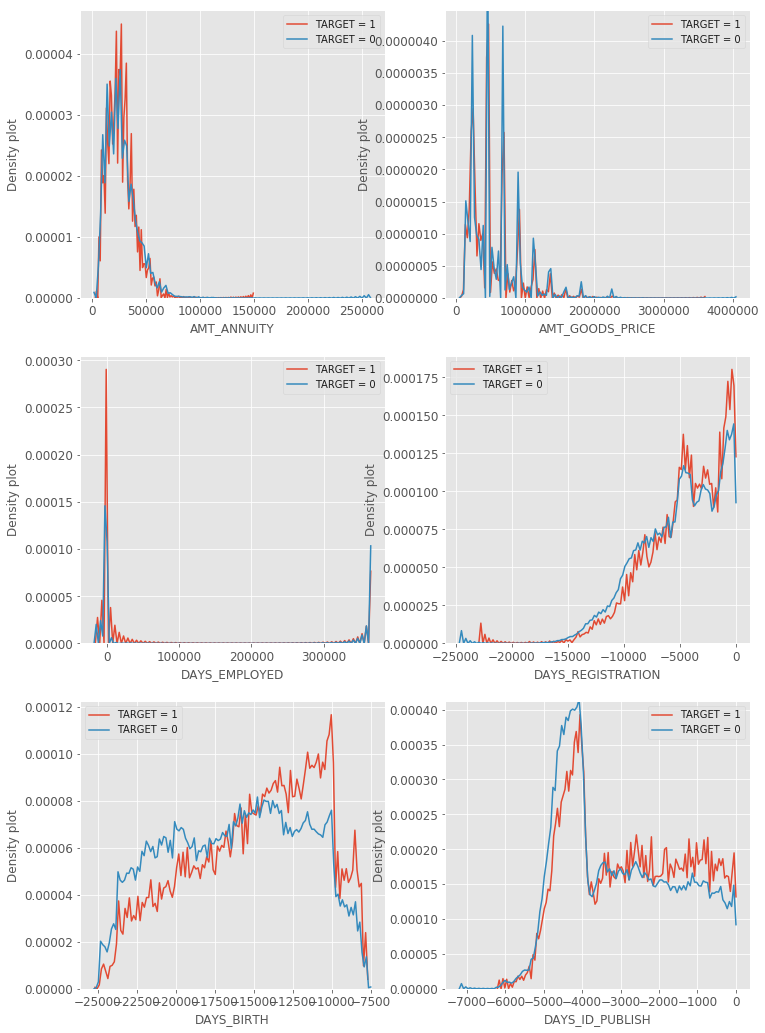

In [10]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(train, var,nrow=3)

## Pearson Correlation of features

In [11]:
def plot_heatmap(dataset):
    data = [
        go.Heatmap(
            z= dataset.corr().values,
            x=dataset.columns.values,
            y=dataset.columns.values,
            colorscale='Viridis',
            reversescale = False,
            text = True ,
            opacity = 1.0 )
    ]

    layout = go.Layout(
        title='Pearson Correlation of features',
        xaxis = dict(ticks='', nticks=36),
        yaxis = dict(ticks='' ),
        width = 900, height = 700,
    margin=dict(
        l=240,
    ),)

    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig, filename='labelled-heatmap')

plot_heatmap(train)

In [ ]:
def plot_sns_heatmap():
    colormap = plt.cm.Greens
    plt.figure(figsize=(14,12))

    sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
                 cmap = colormap, linecolor='white'
               #, square=True, annot=True
               )
    return plt.show()
    
# plot_sns_heatmap()

In [8]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Group by the client id, calculate aggregation statistics


bureau_agg = bureau.drop(['SK_ID_BUREAU'], axis=1).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
# bureau_agg.head()

# List of column names
columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))
            
# Assign the list of columns names as the dataframe column names
bureau_agg.columns = columns
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,NaN
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,NaN
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


In [10]:
# Now we simply merge with the training data as we did before.

# Merge with the training data
train = train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,8.0,-499.875,-7.0,-1185.0,-3999.0,7.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,4.0,-816.000,-43.0,-2131.0,-3264.0,0.0,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2.0,-532.000,-382.0,-682.0,-1064.0,0.0,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1.0,-783.000,-783.0,-783.0,-783.0,0.0,NaN,NaN,NaN,NaN


In [12]:
# Merge with the value counts of bureau
test = test.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

print(df_train.shape)
print(train.shape)

print(df_test.shape)
print(test.shape)



(307511, 122)
(307511, 182)
(48744, 121)
(48744, 181)


## Feature Importance using Random forest

** Normalizando features categóricas **

In [13]:
# Trasnforma as variaveis categoricas/string numero - label encoder

categorical_feats = [f for f in train.columns if train[f].dtype == 'object']

def normalize_categoric(categorical_feats, train, test): 
    
    for col in categorical_feats:
        lb = preprocessing.LabelEncoder()
        lb.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
        train[col] = lb.transform(list(train[col].values.astype('str')))
        test[col] = lb.transform(list(test[col].values.astype('str')))
        
    return train, test
        
train, test = normalize_categoric(categorical_feats, train, test)

** Normalizando features númericas **

** Todo **

* Qual tecnica realizar? ex.: media, mediana, drop

In [14]:
# Features númericas

# df_train.drop(categorical_feats, axis=1).isnull().sum().sort_values(ascending=False).head()

train.fillna(-1, inplace = True)
test.fillna(-1, inplace = True)

In [15]:
# Duplicado - Deletar depois, só estou vendo o resultado com as novas features do dataset bureau
    
train.fillna(-1, inplace = True)
test.fillna(-1, inplace = True)

rf = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2018)
rf.fit(train.drop(['SK_ID_CURR', 'TARGET'],axis=1), train.TARGET)
features = train.drop(['SK_ID_CURR', 'TARGET'],axis=1).columns.values

x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

In [5]:
# Substituindo os dados missinsg e realizando feature selection com Random Forest.
    
train.fillna(-1, inplace = True)
test.fillna(-1, inplace = True)

rf = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2018)
rf.fit(train.drop(['SK_ID_CURR', 'TARGET'],axis=1), train.TARGET)
features = train.drop(['SK_ID_CURR', 'TARGET'],axis=1).columns.values

x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

## Feature Selection

In [7]:
# Todo: Realizar a seleção das variaveis para o modelo

melhores_features = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                     'NAME_EDUCATION_TYPE', 'DAYS_ID_PUBLISH', 'CODE_GENDER', 
                     'AMT_ANNUITY', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                    'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'NAME_INCOME_TYPE']

melhores_features2 = ['TOTALAREA_MODE',
                     'DEF_60_CNT_SOCIAL_CIRCLE',
                     'DEF_30_CNT_SOCIAL_CIRCLE',
                     'AMT_REQ_CREDIT_BUREAU_YEAR',
                     'HOUR_APPR_PROCESS_START',
                     'OWN_CAR_AGE',
                     'REGION_POPULATION_RELATIVE',
                     'FLAG_DOCUMENT_3',
                     'AMT_INCOME_TOTAL',
                     'NAME_INCOME_TYPE',
                     'DAYS_LAST_PHONE_CHANGE',
                     'ORGANIZATION_TYPE',
                     'AMT_CREDIT',
                     'AMT_GOODS_PRICE',
                     'DAYS_REGISTRATION',
                     'AMT_ANNUITY',
                     'CODE_GENDER',
                     'DAYS_ID_PUBLISH',
                     'NAME_EDUCATION_TYPE',
                     'DAYS_EMPLOYED',
                     'DAYS_BIRTH',
                     'EXT_SOURCE_1',
                     'EXT_SOURCE_3',
                     'EXT_SOURCE_2']

**Balancing Classes**

In [19]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [16]:
# RESAMPLE - DOWNSAPLED

from sklearn.utils import resample

# Separate majority and minority classes
df_majority = train[train.TARGET==0]
df_minority = train[train.TARGET==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=30000,     # to match minority class 24825
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.TARGET.value_counts()

df_downsampled.shape

(54825, 182)

In [ ]:
# RESAMPLE - UPSAMPLED

# Separate majority and minority classes
df_majority = train[train.TARGET==0]
df_minority = train[train.TARGET==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=282686,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.TARGET.value_counts()

## Construindo os modelos

normal data distribution: Counter({0: 282686, 1: 24825})
SMOTE data distribution: Counter({1: 282686, 0: 282686})
Accuracy: 0.9168292619475013


fbeta: 0.014412066650872619


             precision    recall  f1-score   support

          0       0.92      1.00      0.96     70616
          1       0.26      0.01      0.02      6262

avg / total       0.87      0.92      0.88     76878


 Confusion Matrix:
[[70411   205]
 [ 6189    73]]


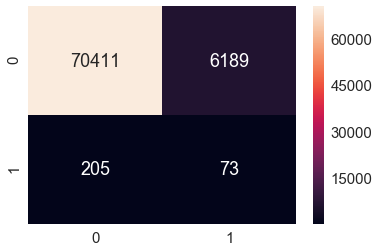

In [19]:
## ESTOU AQUI!!!
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn import model_selection
from collections import Counter

classifier = RandomForestClassifier

# Com os dados train unbalanced
X = train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
Y = train['TARGET']

teste_size = 0.3
seed = 2018

X_train, X_test, Y_train, Y_test = model_selection. \
                                        train_test_split(X, Y, 
                                                         test_size= teste_size, 
                                                         random_state = seed)

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), 
                               classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, Y_train)
smote_prediction = smote_model.predict(X_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(Y)))
X_smote, y_smote = SMOTE().fit_sample(X, Y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,smote_prediction)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, smote_prediction, beta=2)))
print("\n")
print(classification_report(Y_test, smote_prediction))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, smote_prediction))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(smote_prediction, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

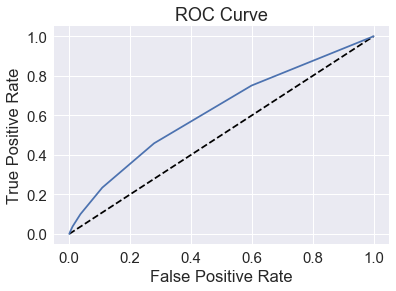

In [20]:
from sklearn.metrics import roc_curve

#Predicting proba
y_pred_prob = smote_model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [17]:
from sklearn import model_selection

# Com os dados train unbalanced
# X = train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
# Y = train['TARGET']

# Com os dados balanced - aplicado resample downsampled
X = df_downsampled.drop(['SK_ID_CURR', 'TARGET'], axis=1)
Y = df_downsampled['TARGET']

# Com os dados balanced - aplicado resample upsampled
# X = df_upsampled.drop(['SK_ID_CURR', 'TARGET'], axis=1)
# Y = df_upsampled['TARGET']

# Obs.: Qnd uso 0.30 o resultado no kaggle é melhor
teste_size = 0.25
seed = 2018

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size= teste_size, random_state = seed)

model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

resultado = model1.score(X_test, Y_test)

print(resultado)

0.629459400306


## Testando outros modelos 

** Melhor modelos no momento:**

1. GradientBoostingClassifier usando Grid Search - 0.69193587368
2. GradientBoostingClassifier - GBC: 0.685877 (0.005219)
3. RandomForestClassifier - 0.623680 (0.006352)


In [17]:
!pip install xgboost

In [18]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

num_folds = 10
num_instances = len(X_train)
seed = 7

modelos = []
#modelos.append(('LR', LogisticRegression()))
#modelos.append(('CART', DecisionTreeClassifier()))
#modelos.append(('NB', GaussianNB()))
modelos.append(('RF', RandomForestClassifier(max_depth=3, max_features=20, n_estimators=5, random_state=seed)))
#modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('GBC', GradientBoostingClassifier(max_depth=5, learning_rate = 0.01, random_state=seed)))
modelos.append(('XGB', XGBClassifier(n_estimators=5, seed=seed, learning_rate=0.8, max_depth=5)))
#modelos.append(('AdaBoost', AdaBoostClassifier(n_estimators=5)))



# RESULTADO: SVC: 0.497784 (0.010603)
# modelos.append(('SVC', SVC())) 

# Avaliando cada modelo
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds, random_state = seed)
    cv_results = cross_validation.cross_val_score(modelo, X_train, Y_train, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



RF: 0.632278 (0.006565)


KeyboardInterrupt: 

### Otimizando Modelo com Grid Search

** Random Forest **

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.5870032223415682, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.5841836734693877, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.5676111185712367, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.5767423123405399, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.5919162078689405, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.6173469387755102, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.6205692803437164, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_featu

[CV]  max_depth=3, max_features=15, n_estimators=10, score=0.6487176044044581, total=   0.2s
[CV] max_depth=3, max_features=15, n_estimators=10 ...................
[CV]  max_depth=3, max_features=15, n_estimators=10, score=0.6406606687256613, total=   0.3s
[CV] max_depth=3, max_features=15, n_estimators=10 ...................
[CV]  max_depth=3, max_features=15, n_estimators=10, score=0.6500604270175909, total=   0.2s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.6568206229860365, total=   0.5s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.6513157894736842, total=   0.6s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.6493890157110246, total=   0.6s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=

[CV] max_depth=5, max_features=4, n_estimators=5 .....................
[CV]  max_depth=5, max_features=4, n_estimators=5, score=0.6274167561761547, total=   0.1s
[CV] max_depth=5, max_features=4, n_estimators=5 .....................
[CV]  max_depth=5, max_features=4, n_estimators=5, score=0.6290279269602578, total=   0.1s
[CV] max_depth=5, max_features=4, n_estimators=5 .....................
[CV]  max_depth=5, max_features=4, n_estimators=5, score=0.6242782328454412, total=   0.1s
[CV] max_depth=5, max_features=4, n_estimators=5 .....................
[CV]  max_depth=5, max_features=4, n_estimators=5, score=0.6269638780717067, total=   0.1s
[CV] max_depth=5, max_features=4, n_estimators=5 .....................
[CV]  max_depth=5, max_features=4, n_estimators=5, score=0.6257553377198872, total=   0.1s
[CV] max_depth=5, max_features=4, n_estimators=10 ....................
[CV]  max_depth=5, max_features=4, n_estimators=10, score=0.6369495166487648, total=   0.2s
[CV] max_depth=5, max_featu

[CV]  max_depth=5, max_features=15, n_estimators=25, score=0.6642051557465092, total=   0.8s
[CV] max_depth=5, max_features=15, n_estimators=25 ...................
[CV]  max_depth=5, max_features=15, n_estimators=25, score=0.6625939849624061, total=   0.8s
[CV] max_depth=5, max_features=15, n_estimators=25 ...................
[CV]  max_depth=5, max_features=15, n_estimators=25, score=0.66107157244528, total=   0.8s
[CV] max_depth=5, max_features=15, n_estimators=25 ...................
[CV]  max_depth=5, max_features=15, n_estimators=25, score=0.6632200886262924, total=   0.8s
[CV] max_depth=5, max_features=15, n_estimators=25 ...................
[CV]  max_depth=5, max_features=15, n_estimators=25, score=0.66107157244528, total=   0.8s
[CV] max_depth=5, max_features=20, n_estimators=3 ....................
[CV]  max_depth=5, max_features=20, n_estimators=3, score=0.6499731471535983, total=   0.2s
[CV] max_depth=5, max_features=20, n_estimators=3 ....................
[CV]  max_depth=5, ma

[CV]  max_depth=10, max_features=4, n_estimators=5, score=0.6327380153081777, total=   0.2s
[CV] max_depth=10, max_features=4, n_estimators=5 ....................
[CV]  max_depth=10, max_features=4, n_estimators=5, score=0.634752249227877, total=   0.1s
[CV] max_depth=10, max_features=4, n_estimators=5 ....................
[CV]  max_depth=10, max_features=4, n_estimators=5, score=0.6425406203840472, total=   0.2s
[CV] max_depth=10, max_features=4, n_estimators=10 ...................
[CV]  max_depth=10, max_features=4, n_estimators=10, score=0.6392320085929108, total=   0.3s
[CV] max_depth=10, max_features=4, n_estimators=10 ...................
[CV]  max_depth=10, max_features=4, n_estimators=10, score=0.6377551020408163, total=   0.3s
[CV] max_depth=10, max_features=4, n_estimators=10 ...................
[CV]  max_depth=10, max_features=4, n_estimators=10, score=0.646703370484759, total=   0.3s
[CV] max_depth=10, max_features=4, n_estimators=10 ...................
[CV]  max_depth=10, m

[CV]  max_depth=10, max_features=15, n_estimators=25, score=0.6736941050087284, total=   1.6s
[CV] max_depth=10, max_features=15, n_estimators=25 ..................
[CV]  max_depth=10, max_features=15, n_estimators=25, score=0.6649657580233651, total=   1.6s
[CV] max_depth=10, max_features=20, n_estimators=3 ...................
[CV]  max_depth=10, max_features=20, n_estimators=3, score=0.6468850698174007, total=   0.3s
[CV] max_depth=10, max_features=20, n_estimators=3 ...................
[CV]  max_depth=10, max_features=20, n_estimators=3, score=0.6499731471535983, total=   0.3s
[CV] max_depth=10, max_features=20, n_estimators=3 ...................
[CV]  max_depth=10, max_features=20, n_estimators=3, score=0.6450919833489996, total=   0.3s
[CV] max_depth=10, max_features=20, n_estimators=3 ...................
[CV]  max_depth=10, max_features=20, n_estimators=3, score=0.6338122733986841, total=   0.3s
[CV] max_depth=10, max_features=20, n_estimators=3 ...................
[CV]  max_dept

[CV]  max_depth=None, max_features=4, n_estimators=5, score=0.5900362562105546, total=   0.3s
[CV] max_depth=None, max_features=4, n_estimators=5 ..................
[CV]  max_depth=None, max_features=4, n_estimators=5, score=0.5980931918893514, total=   0.3s
[CV] max_depth=None, max_features=4, n_estimators=10 .................
[CV]  max_depth=None, max_features=4, n_estimators=10, score=0.6221804511278195, total=   0.6s
[CV] max_depth=None, max_features=4, n_estimators=10 .................
[CV]  max_depth=None, max_features=4, n_estimators=10, score=0.6087540279269602, total=   0.6s
[CV] max_depth=None, max_features=4, n_estimators=10 .................
[CV]  max_depth=None, max_features=4, n_estimators=10, score=0.6163555794279576, total=   0.6s
[CV] max_depth=None, max_features=4, n_estimators=10 .................
[CV]  max_depth=None, max_features=4, n_estimators=10, score=0.6019873774674366, total=   0.6s
[CV] max_depth=None, max_features=4, n_estimators=10 .................
[CV]  

[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.6516718141533503, total=   3.5s
[CV] max_depth=None, max_features=15, n_estimators=25 ................
[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.6504632738015308, total=   3.5s
[CV] max_depth=None, max_features=20, n_estimators=3 .................
[CV]  max_depth=None, max_features=20, n_estimators=3, score=0.6122448979591837, total=   0.6s
[CV] max_depth=None, max_features=20, n_estimators=3 .................
[CV]  max_depth=None, max_features=20, n_estimators=3, score=0.6075456498388829, total=   0.6s
[CV] max_depth=None, max_features=20, n_estimators=3 .................
[CV]  max_depth=None, max_features=20, n_estimators=3, score=0.6077615147039076, total=   0.6s
[CV] max_depth=None, max_features=20, n_estimators=3 .................
[CV]  max_depth=None, max_features=20, n_estimators=3, score=0.60171881294481, total=   0.6s
[CV] max_depth=None, max_features=20, n_estimators=3 .................
[CV]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  5.3min finished


0.687810511051
{'max_depth': 5}
Predict ...
Accuracy: 0.6767904616128253


fbeta: 0.681941215807407


             precision    recall  f1-score   support

          0       0.67      0.67      0.67      6138
          1       0.68      0.68      0.68      6275

avg / total       0.68      0.68      0.68     12413


 Confusion Matrix:
[[4118 2020]
 [1992 4283]]


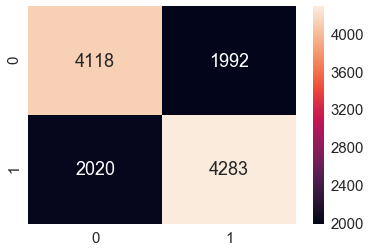

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [3,5, 10,None],
              "n_estimators":[3,5,10,25],
              "max_features": [4,7,15,20, 25]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search2 = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=4)
grid_search2.fit(X_train, Y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

print('Predict ...')
y_pred = grid_search2.predict(X_test)

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,y_pred)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, y_pred, beta=2)))
print("\n")
print(classification_report(Y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [41]:
print(grid_search2.best_score_)
print(grid_search2.best_params_)

0.672234605366
{'max_depth': 10, 'max_features': 25, 'n_estimators': 25}


In [31]:
#trainning with the best params

#model_rf = RandomForestClassifier(max_depth=3, max_features=20, n_estimators=5, random_state=7)

#model_rf.fit(X_train, Y_train)
#y_pred = model_rf.predict(X_test)


y_pred = grid_search.predict(X_test)

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,y_pred)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, y_pred, beta=2)))
print("\n")
print(classification_report(Y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

### Melhor modelo ate o momento 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] max_depth=3 .....................................................
[CV] ............ max_depth=3, score=0.6844790547798066, total=  11.5s
[CV] max_depth=3 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s


[CV] ............ max_depth=3, score=0.6906552094522019, total=  11.6s
[CV] max_depth=3 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.3s remaining:    0.0s


[CV] ............ max_depth=3, score=0.6892708473210689, total=  11.7s
[CV] max_depth=3 .....................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   35.1s remaining:    0.0s


[CV] ............ max_depth=3, score=0.6833624278232845, total=  11.9s
[CV] max_depth=3 .....................................................
[CV] ............ max_depth=3, score=0.6872566134013697, total=  11.4s
[CV] max_depth=5 .....................................................
[CV] ............ max_depth=5, score=0.6838077336197637, total=  30.1s
[CV] max_depth=5 .....................................................
[CV] ............ max_depth=5, score=0.6925349087003222, total=  29.5s
[CV] max_depth=5 .....................................................
[CV] ............. max_depth=5, score=0.693165032899154, total=  29.6s
[CV] max_depth=5 .....................................................
[CV] ............. max_depth=5, score=0.680273935813079, total=  31.6s
[CV] max_depth=5 .....................................................
[CV] ............ max_depth=5, score=0.6883308714918759, total=  32.3s
[CV] max_depth=6 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 15.3min finished


Predict ...
Accuracy: 0.6919358736808185


fbeta: 0.692302780704275


             precision    recall  f1-score   support

          0       0.69      0.69      0.69      6138
          1       0.70      0.69      0.69      6275

avg / total       0.69      0.69      0.69     12413


 Confusion Matrix:
[[4252 1886]
 [1938 4337]]


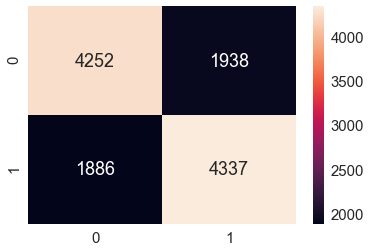

In [32]:


#Seting the Hyper Parameters
param_test1 = {
 'max_depth':[3,5,6,8]
}

#Creating the classifier
model_xg = GradientBoostingClassifier(random_state=7)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train, Y_train)

print('Predict ...')
y_pred = grid_search.predict(X_test)

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,y_pred)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, y_pred, beta=2)))
print("\n")
print(classification_report(Y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [33]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.687622525982
{'max_depth': 5}


Fitting 5 folds for each of 23 candidates, totalling 115 fits
[CV] n_estimators=20 .................................................
[CV] n_estimators=20 .................................................
[CV] n_estimators=20 .................................................
[CV] n_estimators=20 .................................................
[CV] ........ n_estimators=20, score=0.7267257379950073, total=   1.3s
[CV] n_estimators=20 .................................................
[CV] ........ n_estimators=20, score=0.7226593923556279, total=   1.3s
[CV] n_estimators=30 .................................................
[CV] ........ n_estimators=20, score=0.7348531152379462, total=   1.3s
[CV] n_estimators=30 .................................................
[CV] ........ n_estimators=20, score=0.7292222381704914, total=   1.3s
[CV] n_estimators=30 .................................................
[CV] ........ n_estimators=20, score=0.7274154355043577, total=   1.4s
[CV] n_estimato

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   10.0s


[CV] ........ n_estimators=50, score=0.7444787933299047, total=   2.5s
[CV] n_estimators=60 .................................................
[CV] ........ n_estimators=50, score=0.7397391279887077, total=   2.5s
[CV] n_estimators=60 .................................................
[CV] ......... n_estimators=50, score=0.738095406393557, total=   2.5s
[CV] n_estimators=60 .................................................
[CV] ........ n_estimators=60, score=0.7421628816886093, total=   2.9s
[CV] n_estimators=60 .................................................
[CV] ........ n_estimators=60, score=0.7416775911127648, total=   2.8s
[CV] n_estimators=70 .................................................
[CV] ........ n_estimators=60, score=0.7458420097127364, total=   2.8s
[CV] n_estimators=70 .................................................
[CV] ........ n_estimators=60, score=0.7416640039468361, total=   2.9s
[CV] n_estimators=70 .................................................
[CV] .

[CV] ....... n_estimators=170, score=0.7510812677837724, total=   6.6s
[CV] n_estimators=170 ................................................
[CV] ....... n_estimators=170, score=0.7521224432109075, total=   6.5s
[CV] n_estimators=180 ................................................
[CV] ....... n_estimators=170, score=0.7572188798977516, total=   6.4s
[CV] n_estimators=180 ................................................
[CV] ........ n_estimators=170, score=0.750564652881111, total=   6.3s
[CV] n_estimators=180 ................................................
[CV] ....... n_estimators=170, score=0.7509017784564207, total=   6.6s
[CV] n_estimators=180 ................................................
[CV] ....... n_estimators=180, score=0.7514157072623411, total=   7.1s
[CV] n_estimators=180 ................................................
[CV] ....... n_estimators=180, score=0.7526004508226866, total=   7.0s
[CV] n_estimators=190 ................................................
[CV] .

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.8min


[CV] ....... n_estimators=200, score=0.7514176541933288, total=   7.4s
[CV] n_estimators=200 ................................................
[CV] ....... n_estimators=200, score=0.7526667185848263, total=   7.4s
[CV] n_estimators=210 ................................................
[CV] ....... n_estimators=200, score=0.7581940484425072, total=   7.3s
[CV] n_estimators=210 ................................................
[CV] ....... n_estimators=200, score=0.7516992239764517, total=   7.4s
[CV] n_estimators=210 ................................................
[CV] ....... n_estimators=200, score=0.7520131965116087, total=   7.4s
[CV] n_estimators=210 ................................................
[CV] ....... n_estimators=210, score=0.7514046025448551, total=   7.8s
[CV] n_estimators=210 ................................................
[CV] ....... n_estimators=210, score=0.7526542438047935, total=   7.8s
[CV] n_estimators=220 ................................................
[CV] .

[Parallel(n_jobs=4)]: Done 115 out of 115 | elapsed:  2.7min finished


Predict ...
Best params: {'n_estimators': 240} - Best score: 0.75371279265465
Accuracy: 0.6916941915733505


fbeta: 0.6887673511162286


             precision    recall  f1-score   support

          0       0.68      0.70      0.69      6138
          1       0.70      0.69      0.69      6275

avg / total       0.69      0.69      0.69     12413


 Confusion Matrix:
[[4279 1859]
 [1968 4307]]


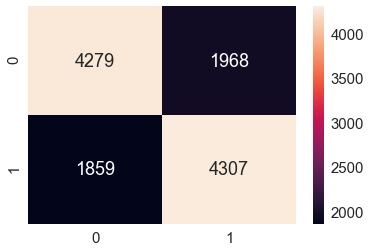

In [30]:
## MELHOR MODELO ATE ENTAO - 24/09

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_test1 = {'n_estimators':range(20,250,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               min_samples_split=500,
                                                               min_samples_leaf=50,
                                                               max_depth=5,
                                                               max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=10),
                        param_grid = param_test1, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5, 
                       verbose=4)

gsearch1.fit(X_train,Y_train)


print('Predict ...')
y_pred = gsearch1.predict(X_test)

print('Best params: {0} - Best score: {1}'.format(gsearch1.best_params_, gsearch1.best_score_))

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,y_pred)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, y_pred, beta=2)))
print("\n")
print(classification_report(Y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()



Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] learning_rate=0.1 ...............................................
[CV] learning_rate=0.1 ...............................................
[CV] learning_rate=0.1 ...............................................
[CV] learning_rate=0.1 ...............................................
[CV] ....... learning_rate=0.1, score=0.743480120245083, total=   6.0s
[CV] ...... learning_rate=0.1, score=0.7526821919972997, total=   5.9s
[CV] ...... learning_rate=0.1, score=0.7560235333940781, total=   6.0s
[CV] learning_rate=0.1 ...............................................
[CV] learning_rate=0.01 ..............................................
[CV] ....... learning_rate=0.1, score=0.758393770278048, total=   5.9s
[CV] learning_rate=0.01 ..............................................
[CV] learning_rate=0.01 ..............................................
[CV] ....... learning_rate=0.1, score=0.761525142003789, total=   5.9s
[CV] learning_rat

[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:   22.8s remaining:    5.7s


[CV] .... learning_rate=0.001, score=0.7260893779133567, total=   7.2s
[CV] ..... learning_rate=0.001, score=0.734834673433965, total=   6.8s
[CV] .... learning_rate=0.001, score=0.7339936757740024, total=   6.7s


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   29.7s finished


Predict ...
Best params: {'learning_rate': 0.1} - Best score: 0.7544209515836596
Accuracy: 0.6945356387247392


fbeta: 0.6319544442989921


             precision    recall  f1-score   support

          0       0.71      0.76      0.73      7492
          1       0.68      0.62      0.65      6215

avg / total       0.69      0.69      0.69     13707


 Confusion Matrix:
[[5658 1834]
 [2353 3862]]


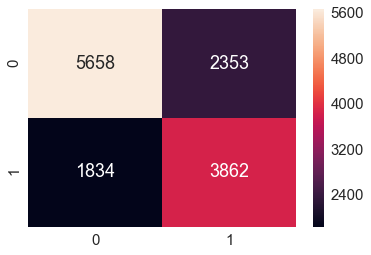

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_test1 = {'learning_rate': [0.1,0.01,0.001]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(min_samples_split=500,
                                                               min_samples_leaf=50,
                                                               max_depth=5,
                                                               max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=10, 
                                                               n_estimators=240),
                                        param_grid = param_test1, 
                                        scoring='roc_auc',
                                        n_jobs=4,
                                        iid=False, 
                                        cv=5, 
                                       verbose=4)

gsearch1.fit(X_train,Y_train)


print('Predict ...')
y_pred = gsearch1.predict(X_test)

print('Best params: {0} - Best score: {1}'.format(gsearch1.best_params_, gsearch1.best_score_))

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,y_pred)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, y_pred, beta=2)))
print("\n")
print(classification_report(Y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] subsample=0.8 ...................................................
[CV] subsample=0.8 ...................................................
[CV] subsample=0.8 ...................................................
[CV] subsample=0.8 ...................................................
[CV] .......... subsample=0.8, score=0.7510235465233555, total=  15.0s
[CV] subsample=0.8 ...................................................
[CV] .......... subsample=0.8, score=0.7609406864606836, total=  15.0s


[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:   16.3s remaining:   24.5s


[CV] .......... subsample=0.8, score=0.7571739564790716, total=  15.1s
[CV] .......... subsample=0.8, score=0.7602935212558293, total=  15.1s
[CV] .......... subsample=0.8, score=0.7681068783926577, total=  10.5s


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   27.2s finished


Predict ...
Best params: {'subsample': 0.8} - Best score: 0.7595077178223196
Accuracy: 0.6975997665426424


fbeta: 0.6322121688958825


             precision    recall  f1-score   support

          0       0.71      0.76      0.73      7492
          1       0.68      0.62      0.65      6215

avg / total       0.70      0.70      0.70     13707


 Confusion Matrix:
[[5705 1787]
 [2358 3857]]


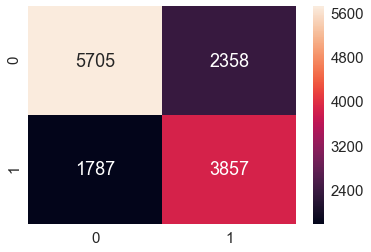

In [21]:
## ULTIMO MODELO TESTADO - resultado caiu para 0.67938

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_test1 = {'subsample': [0.8]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                               min_samples_split=500,
                                                               min_samples_leaf=50,
                                                               max_depth=5,
                                                               max_features='sqrt',
                                                               random_state=10, 
                                                               n_estimators=240),
                                        param_grid = param_test1, 
                                        scoring='roc_auc',
                                        n_jobs=4,
                                        iid=False, 
                                        cv=5, 
                                       verbose=4)

gsearch1.fit(X_train,Y_train)


print('Predict ...')
y_pred = gsearch1.predict(X_test)

print('Best params: {0} - Best score: {1}'.format(gsearch1.best_params_, gsearch1.best_score_))

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,y_pred)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, y_pred, beta=2)))
print("\n")
print(classification_report(Y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()


## Validação dos modelos

In [44]:
# Gradient Boosting 
rf = modelos[1][1]

# Random Forest
# rf = model1 

rf.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

Accuracy: 0.686377185209055


fbeta: 0.6874321822939937


             precision    recall  f1-score   support

          0       0.68      0.69      0.68      6138
          1       0.69      0.69      0.69      6275

avg / total       0.69      0.69      0.69     12413


 Confusion Matrix:
[[4212 1926]
 [1967 4308]]


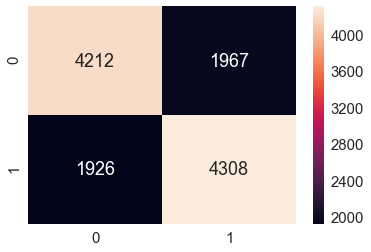

In [45]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,y_pred)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, y_pred, beta=2)))
print("\n")
print(classification_report(Y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

Accuracy: 0.6886328848787562


fbeta: 0.6879312547917199


             precision    recall  f1-score   support

          0       0.68      0.69      0.69      6138
          1       0.69      0.69      0.69      6275

avg / total       0.69      0.69      0.69     12413


 Confusion Matrix:
[[4241 1897]
 [1968 4307]]


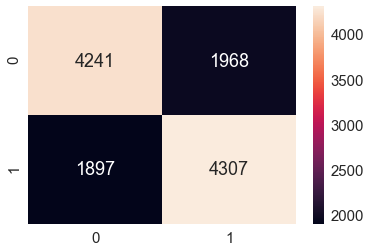

In [37]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,y_pred)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, y_pred, beta=2)))
print("\n")
print(classification_report(Y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

### Diagnosticando se o modelo sofre de Overfitting

IndexError: index 799 is out of bounds for axis 0 with size 100

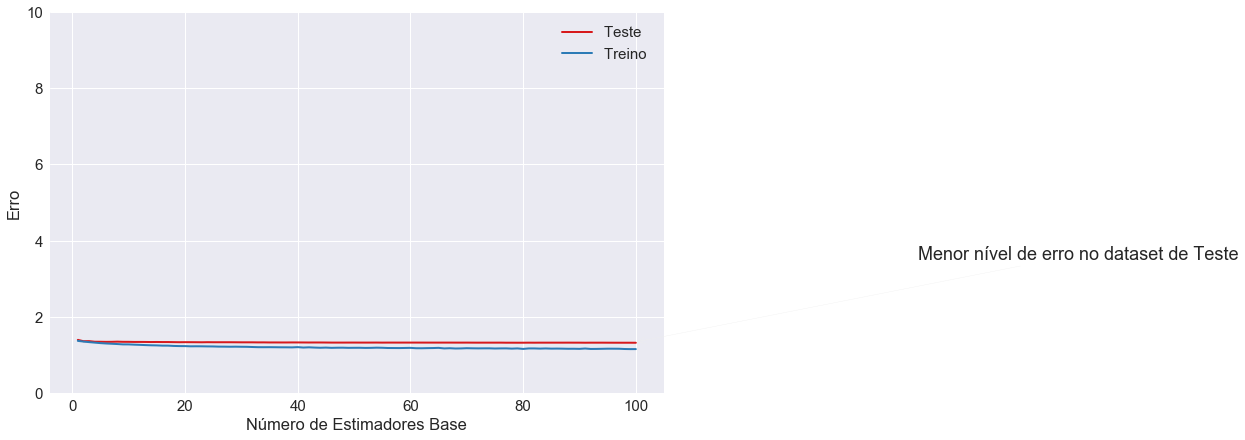

In [49]:
annotation_kw = {'xycoords': 'data', 'textcoords': 'data', 'arrowprops': {'arrowstyle': '->', 'connectionstyle': 'arc'}}

def deviance_plot(est, X_test, y_test, ax=None, label='', train_color='#2c7bb6', test_color='#d7191c', alpha=1.0, ylim = (0, 10)):
    n_estimators = len(est.estimators_)
    test_dev = np.empty(n_estimators)
    FIGSIZE = (11, 7)

    for i, pred in enumerate(est.staged_predict(X_test)):
       test_dev[i] = est.loss_(y_test, pred)

    if ax is None:
        fig = plt.figure(figsize = FIGSIZE)
        ax = plt.gca()
        
    ax.plot(np.arange(n_estimators) + 1, test_dev, color = test_color, label = 'Teste %s' % label, linewidth = 2, alpha = alpha)
    ax.plot(np.arange(n_estimators) + 1, est.train_score_, color = train_color, label = 'Treino %s' % label, linewidth = 2, alpha = alpha)
    ax.set_ylabel('Erro')
    ax.set_xlabel('Número de Estimadores Base')
    ax.set_ylim(ylim)
    return test_dev, ax

# Aplica a função aos dados de teste para medir o overfitting do nosso modelo (est)
test_dev, ax = deviance_plot(rf, X_test, Y_test)
ax.legend(loc = 'upper right')

# Legendas
ax.annotate('Menor nível de erro no dataset de Teste', 
            xy = (test_dev.argmin() + 1, test_dev.min() + 0.02), 
            xytext = (150, 3.5), 
            **annotation_kw)

ann = ax.annotate('', xy = (800, test_dev[799]),  xycoords = 'data',
                  xytext = (800, est.train_score_[799]), textcoords = 'data',
                  arrowprops = {'arrowstyle': '<->'})
ax.text(810, 3.5, 'Gap Treino-Teste')

**Confusion Matrix**

Confusion matrix, without normalization
[[5323 2072]
 [3504 3996]]


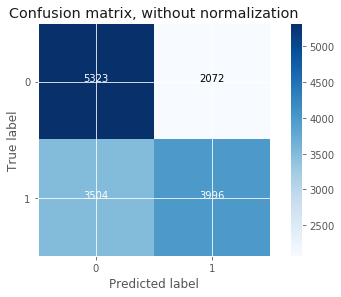

In [32]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

class_names = [0,1]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

Confusion matrix, without normalization
[[4378 1760]
 [2854 3421]]


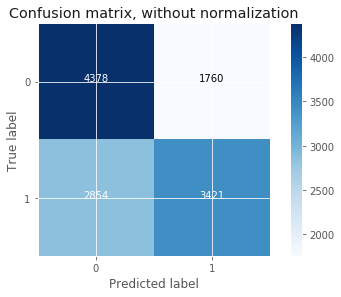

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

class_names = [0,1]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

**ROC Curve**

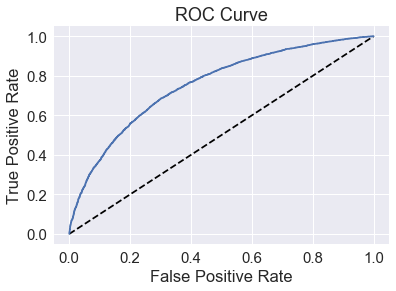

In [32]:
from sklearn.metrics import roc_curve

#Predicting proba
y_pred_prob = grid_search.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

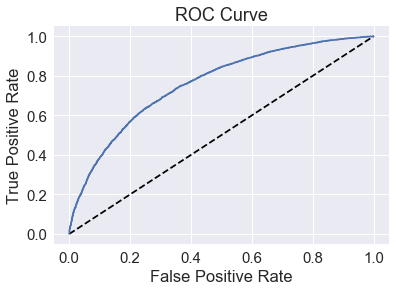

In [22]:
from sklearn.metrics import roc_curve

#Predicting proba
y_pred_prob = gsearch1.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

**Salva modelo no disco rigido**

In [ ]:
import pickle

# Salvando o modelo
arquivo = 'modelo_v1.sav'
pickle.dump(modelo, open(arquivo, 'wb'))

# Carregando o arquivo
modelo_v1 = pickle.load(open(arquivo, 'rb'))
resultado = modelo_v1.score(X_teste, Y_teste)

In [23]:
df_resultado = pd.DataFrame()

df_resultado['SK_ID_CURR'] = test['SK_ID_CURR']
test_predict = test.drop('SK_ID_CURR', axis=1)

test_predict.head()

df_resultado['TARGET'] = gsearch1.predict(test_predict)

df_resultado.to_csv('resultado_9_gridsearch1.csv', index=False)

### Todo: Testar o pipeline abaixo

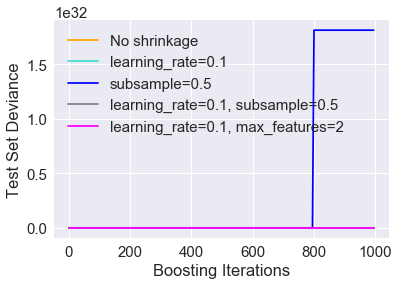

In [42]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets


# map labels from {-1, 1} to {0, 1}
labels, y = np.unique(Y, return_inverse=True)

original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}

plt.figure()

for label, color, setting in [('No shrinkage', 'orange',
                               {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.1', 'turquoise',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('subsample=0.5', 'blue',
                               {'learning_rate': 1.0, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5', 'gray',
                               {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.1, max_features=2', 'magenta',
                               {'learning_rate': 0.1, 'max_features': 2})]:
    params = dict(original_params)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, Y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(Y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')

plt.show()

## RASCUNHO

In [ ]:
temp = train["ORGANIZATION_TYPE"].value_counts()
temp.iplot(kind='bar', xTitle = 'Organization Name', yTitle = "Count", 
           title = 'Types of Organizations who applied for loan ', color = 'red')

In [ ]:
# Criando o data set por Tipo de Organização

def create_score_organization_type():

    temp = pd.DataFrame(train.groupby(['ORGANIZATION_TYPE', 'TARGET']).size())
    temp.reset_index(inplace=True)
    temp.rename(columns = {0:'Qtde'}, inplace = True)

    score_organization = pd.pivot_table(temp,index=['ORGANIZATION_TYPE'], columns=['TARGET'], 
                                        values=['Qtde'], aggfunc=[np.sum], fill_value=0, margins=True)
    score_organization.reset_index(inplace=True)
    score_organization.rename(columns={ 0:'good_credit', 1:'bad_credit'}, inplace=True)
    score_organization = score_organization.sort_values(by=[('sum', 'Qtde', 'All')], ascending=False)[1:len(score_organization)]

    return score_organization

score_organization = create_score_organization_type()


In [ ]:
trace1 = go.Bar(
    x = score_organization['ORGANIZATION_TYPE'],
    y = score_organization[('sum', 'Qtde', 'good_credit')],
    name = 'Good'
)
trace2 = go.Bar(
    x = score_organization['ORGANIZATION_TYPE'],
    y = score_organization[('sum', 'Qtde', 'bad_credit')],
    name = 'Bad'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack', 
    title='Contratos por Tipo de Organização'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [ ]:
temp = train["OCCUPATION_TYPE"].value_counts()
temp.iplot(kind='bar', xTitle = 'Occupation', yTitle = "Count", title = 'Occupation of Applicant\'s who applied for loan', color = 'green')